<a href="https://colab.research.google.com/github/CMedrado/Topicosemcomputa-o/blob/main/03_Classifica%C3%A7%C3%A3o_de_Texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Texto

Exemplo de classificação de texto com pipeline de NLP e classificador no final

In [72]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [73]:
# Tokenização
def tokenize(text):
    # Tokenização
    tokens = nltk.word_tokenize(text)
    
    # Stemização
    stems  = []
    for item in tokens:
        stems.append(SnowballStemmer("english").stem(item))
    return stems

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
#df = pd.read_csv('Eclipse_total.csv')

# Carregando os dados
df = pd.read_csv('/content/drive/My Drive/TP/eclipse/Case_Study/Case_Study/Eclipse_total.csv') # Salvamos com esse nome antes

# Dataset
df.head(10)

,ID,Product_Name,Processed_Summary,Processed_Description,Component_Name,Severity_Level,Priority,Assignee_Developers,Topic_ID,Status
0,221036,Community,unabl enter request parti code cq,report enter request parti librari submit java...,Project Management & Portal,blocker,P1,bjorn.freeman-benson,d_a_carver bjorn.freeman-benson karl.matthias,FIXED
1,221203,Community,submit request cq cq submit,submit request cq cq submit creat screen retur...,Project Management & Portal,blocker,P1,bjorn.freeman-benson,d_a_carver d_a_carver bjorn.freeman-benson kar...,FIXED
2,243952,Community,ca submit cq rd parti contribut develop apach,valid apach url enter url project page apach p...,Project Management & Portal,blocker,P1,bjorn.freeman-benson,ekuleshov ekuleshov bjorn.freeman-benson ekule...,FIXED
3,230229,Community,tool link fail ie,webmast email tool link respond js error error...,Project Management & Portal,blocker,P1,gabe.obrien,webmaster webmaster bjorn.freeman-benson karl....,FIXED
4,229095,Community,cron total broken,portal cron job broken friday gabe debug fix c...,Project Management & Portal,blocker,P1,portal-inbox,karl.matthias karl.matthias karl.matthias karl...,FIXED
5,109230,Community,gener roadmap project inform file,xslt css gener roadmap eclipse project info xm...,Process,critical,P1,eromero,bjorn.freeman-benson techtonik bjorn.freeman-b...,FIXED
6,275926,Community,cq for record blow address charact,appear addslash stripslash appli properli case...,Project Management & Portal,critical,P1,portal-inbox,karl.matthias karl.matthias karl.matthias,FIXED
7,208204,Community,javascript error submit cq,submit request refer distribut third parti cod...,Project Management & Portal,critical,P1,gabe.obrien,aldo_eisma bjorn.freeman-benson gabe.obrien ka...,FIXED
8,229830,Community,alexey pavlov nomin email address,portal allow nomin miss email address fix,Project Management & Portal,critical,P1,portal-inbox,karl.matthias bjorn.freeman-benson karl.matthi...,FIXED
9,191261,Community,role upload imag inconsist role edit web page,request design peopl role updat organ websit m...,Project Management & Portal,critical,P1,portal-inbox,donald.smith donald.smith bjorn.freeman-benson...,FIXED


In [76]:
class_names = df['Status'].unique()
class_names

array(['FIXED', nan], dtype=object)

Já possui apenas Fixed.
Tirando os casos de Severity Level que são normal


In [87]:
# Removendo valores
df = df[df.Severity_Level != "normal"]

# Apresentando dataset
df.head(10)

,ID,Product_Name,Component_Name,Severity_Level,Priority,Assignee_Developers,Topic_ID,Status,Processed_Description_Processed_Summary
0,221036,Community,Project Management & Portal,blocker,P1,bjorn.freeman-benson,d_a_carver bjorn.freeman-benson karl.matthias,FIXED,report enter request parti librari submit java...
1,221203,Community,Project Management & Portal,blocker,P1,bjorn.freeman-benson,d_a_carver d_a_carver bjorn.freeman-benson kar...,FIXED,submit request cq cq submit creat screen retur...
2,243952,Community,Project Management & Portal,blocker,P1,bjorn.freeman-benson,ekuleshov ekuleshov bjorn.freeman-benson ekule...,FIXED,valid apach url enter url project page apach p...
3,230229,Community,Project Management & Portal,blocker,P1,gabe.obrien,webmaster webmaster bjorn.freeman-benson karl....,FIXED,webmast email tool link respond js error error...
4,229095,Community,Project Management & Portal,blocker,P1,portal-inbox,karl.matthias karl.matthias karl.matthias karl...,FIXED,portal cron job broken friday gabe debug fix c...
5,109230,Community,Process,critical,P1,eromero,bjorn.freeman-benson techtonik bjorn.freeman-b...,FIXED,xslt css gener roadmap eclipse project info xm...
6,275926,Community,Project Management & Portal,critical,P1,portal-inbox,karl.matthias karl.matthias karl.matthias,FIXED,appear addslash stripslash appli properli case...
7,208204,Community,Project Management & Portal,critical,P1,gabe.obrien,aldo_eisma bjorn.freeman-benson gabe.obrien ka...,FIXED,submit request refer distribut third parti cod...
8,229830,Community,Project Management & Portal,critical,P1,portal-inbox,karl.matthias bjorn.freeman-benson karl.matthi...,FIXED,portal allow nomin miss email address fix alex...
9,191261,Community,Project Management & Portal,critical,P1,portal-inbox,donald.smith donald.smith bjorn.freeman-benson...,FIXED,request design peopl role updat organ websit m...


Juntando as listas Processed_Description	e Processed_Summary


In [100]:
df["processed"] = df["Processed_Description"]+df["Processed_Summary"]
df.drop("Processed_Description", inplace=True, axis=1)
df.drop("Processed_Summary", inplace=True, axis=1)
df = df.dropna()
df.head(10)

,ID,Product_Name,Component_Name,Severity_Level,Priority,Assignee_Developers,Topic_ID,Status,processed
0,221036,Community,Project Management & Portal,blocker,P1,bjorn.freeman-benson,d_a_carver bjorn.freeman-benson karl.matthias,FIXED,report enter request parti librari submit java...
1,221203,Community,Project Management & Portal,blocker,P1,bjorn.freeman-benson,d_a_carver d_a_carver bjorn.freeman-benson kar...,FIXED,submit request cq cq submit creat screen retur...
2,243952,Community,Project Management & Portal,blocker,P1,bjorn.freeman-benson,ekuleshov ekuleshov bjorn.freeman-benson ekule...,FIXED,valid apach url enter url project page apach p...
3,230229,Community,Project Management & Portal,blocker,P1,gabe.obrien,webmaster webmaster bjorn.freeman-benson karl....,FIXED,webmast email tool link respond js error error...
4,229095,Community,Project Management & Portal,blocker,P1,portal-inbox,karl.matthias karl.matthias karl.matthias karl...,FIXED,portal cron job broken friday gabe debug fix c...
5,109230,Community,Process,critical,P1,eromero,bjorn.freeman-benson techtonik bjorn.freeman-b...,FIXED,xslt css gener roadmap eclipse project info xm...
6,275926,Community,Project Management & Portal,critical,P1,portal-inbox,karl.matthias karl.matthias karl.matthias,FIXED,appear addslash stripslash appli properli case...
7,208204,Community,Project Management & Portal,critical,P1,gabe.obrien,aldo_eisma bjorn.freeman-benson gabe.obrien ka...,FIXED,submit request refer distribut third parti cod...
8,229830,Community,Project Management & Portal,critical,P1,portal-inbox,karl.matthias bjorn.freeman-benson karl.matthi...,FIXED,portal allow nomin miss email address fix alex...
9,191261,Community,Project Management & Portal,critical,P1,portal-inbox,donald.smith donald.smith bjorn.freeman-benson...,FIXED,request design peopl role updat organ websit m...


In [101]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(df[['processed']], df.Severity_Level, random_state=42)
X_train.shape

(30876, 1)

In [102]:
# Stop Words

nltk.download('stopwords')

nltk.download('punkt')

stop_words = nltk.corpus.stopwords.words('portuguese')

# NLP Pipeline
text_clf   = Pipeline([
                # Vectorize
                ('vect',  TfidfVectorizer(tokenizer=tokenize, 
                                          stop_words=stop_words, 
                                          ngram_range=(1,1))),
                # Classificador
                ('clf',   KNeighborsClassifier(n_jobs=-1)),
            ])

# Train
text_clf = text_clf.fit(X_train.processed, y_train)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
# Evaluate
text_clf.score(X_test.processed, y_test)

0.6778393082677547

In [104]:

predictions = text_clf.predict(X_test.processed)

conf_matrix = confusion_matrix(y_test, predictions)

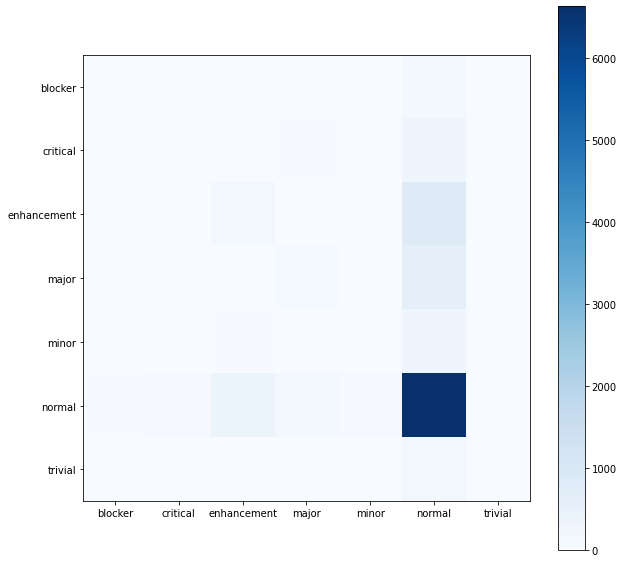

In [105]:
plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(text_clf.classes_)),text_clf.classes_)
plt.yticks(np.arange(len(text_clf.classes_)),text_clf.classes_)
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()

In [106]:
# Predict

text = "Alimentos naturais fazem bem ao corpo" #Documento novo nao utilizado no treinamento

text_clf.predict([text])

array(['enhancement'], dtype=object)

In [107]:
# Predict

text = "Filme 'Star Wars: Os Últimos Jedi'"

text_clf.predict([text])

array(['normal'], dtype=object)